In [3]:
import numpy as np
np.set_printoptions(suppress=True)
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [4]:
# (a) 
# create polynomial matrix
def generateX(x, d):
    power = np.arange(d+1)
    X = np.tile(x,d+1).reshape(d+1, len(x)).T**power
    return X

In [5]:
# (b)
# maximum likelihood estimator
def max_like_est(X, y):
    return ((inv(X.T@X)@(X.T))@y)

In [6]:
# (c)
# measured square error
def MSE(w, X, y):
    return 1/len(y)*((X@w-y).T@(X@w-y))

In [7]:
# (d) best degree
#find the best degree d twith small validation error 
val_err = np.zeros(20, dtype=float)
x_train, y_train = np.loadtxt('TrainingSet1D.csv', delimiter = ',', unpack=True)
x_val, y_val = np.loadtxt('ValidationSet1D.csv', delimiter = ',', unpack=True)

for d in np.arange(0,20):
    
    X_d = generateX(x_train, d)
    w_d = max_like_est(X_d, y_train)
    X = generateX(x_val, d)
    val_err[d] = MSE(w_d, X, y_val)
    
print(np.min(val_err))
d = np.argmin(val_err)
print(d)

# the validation error is 0.019139255837550957
# best degree is 2

0.01913925583755064
2


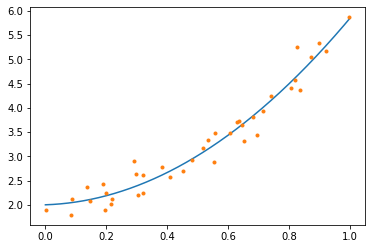

In [8]:
# (d) plot with trainings data
x_train, y_train = np.loadtxt('TrainingSet1D.csv', delimiter = ',', unpack=True)

X_train = generateX(x_train, d)
w_train = max_like_est(X_train, y_train)

x_points = np.linspace(0, 1, 1000)
X_points = generateX(x_points, d)

plt.figure()
plt.plot(x_points, X_points@w_train)
plt.plot(x_train, y_train, '.');


In [9]:
# (d) compute test error
x_test, y_test = np.loadtxt('TestSet1D.csv', delimiter = ',', unpack=True)

X_test = generateX(x_test, d)

print(MSE(w_train, X_test, y_test))
# der Testerror ist 0.02269104426220899

0.02269104426220854


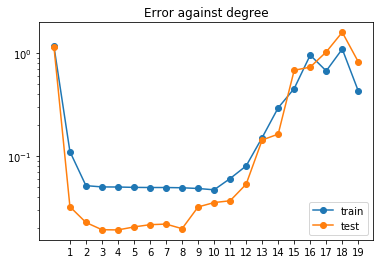

In [10]:
# (e)
# plot training and testdata against degree
a = np.zeros(20, dtype=float)
b = np.zeros(20, dtype=float)

for d in np.arange(20):
    X_train = generateX(x_train, d)
    w_train = max_like_est(X_train, y_train)
    X_test = generateX(x_test, d)
    
    a[d] = MSE(w_train, X_train, y_train)
    b[d] = MSE(w_train, X_test, y_test)
  
d = np.arange(20)
plt.figure()
plt.plot(d, a, marker='o', label='train' )
plt.plot(d, b,marker='o', label='test' )
plt.yscale("log")
plt.title('Error against degree');
plt.xticks(np.arange(1, 20, 1.0))
plt.legend();

In [11]:
# (f)
# ridge regression
def w_ridge(lamb, X, y):
    return inv(X.T@X + lamb*np.eye((X.shape[1])))@(X.T)@y

In [34]:
#(g)
# find a good lambda for ridge regression belongs to the degree
Err_val = np.zeros((19, 100), dtype=float)
a = np.linspace(0, 10, 100)

for i in np.arange(1, 20):
    X_train = generateX(x_train, i)
    X_val = generateX(x_val, i)
    for j in np.arange(1, 101):
        w_train = w_ridge(a[j-1], X_train, y_train)
        Err_val[i-1][j-1] = MSE(w_train, X_val, y_val)
    
m = np.unravel_index(Err_val.argmin(), Err_val.shape)
lamb = a[m[1]+1]
best_d = m[0]+1
print(best_d, lamb)
# best degree is 18
# best lambda is 0.5050505050505051

18 0.5050505050505051


In [35]:
# (g) compute Test Error with lambda
X_train = generateX(x_train, best_d)
w_train = w_ridge(lamb, X_train, y_train)

X_test = generateX(x_test, best_d)

print(MSE(w_train, X_test, y_test))
# test_Error is worse than before

0.027100296297639867
